In [1]:
# Data Collection with SpaceX API
# Importation des bibliothèques
import requests
import pandas as pd

# URL de l'API SpaceX
url = "https://api.spacexdata.com/v4/launches"

# Requête GET
response = requests.get(url)

# Vérification du succès
if response.status_code == 200:
    data = response.json()
    print(f"{len(data)} lancements récupérés avec succès.")
else:
    print("Erreur :", response.status_code)

# Conversion en DataFrame
df = pd.DataFrame(data)

# Affichage des premières lignes
df.head()


205 lancements récupérés avec succès.


,fairings,links,static_fire_date_utc,static_fire_date_unix,net,window,rocket,success,failures,details,...,date_utc,date_unix,date_local,date_precision,upcoming,cores,auto_update,tbd,launch_library_id,id
0,"{'reused': False, 'recovery_attempt': False, '...",{'patch': {'small': 'https://images2.imgbox.co...,2006-03-17T00:00:00.000Z,1.142554e+09,False,0.0,5e9d0d95eda69955f709d1eb,False,"[{'time': 33, 'altitude': None, 'reason': 'mer...",Engine failure at 33 seconds and loss of vehicle,...,2006-03-24T22:30:00.000Z,1143239400,2006-03-25T10:30:00+12:00,hour,False,"[{'core': '5e9e289df35918033d3b2623', 'flight'...",True,False,None,5eb87cd9ffd86e000604b32a
1,"{'reused': False, 'recovery_attempt': False, '...",{'patch': {'small': 'https://images2.imgbox.co...,None,NaN,False,0.0,5e9d0d95eda69955f709d1eb,False,"[{'time': 301, 'altitude': 289, 'reason': 'har...",Successful first stage burn and transition to ...,...,2007-03-21T01:10:00.000Z,1174439400,2007-03-21T13:10:00+12:00,hour,False,"[{'core': '5e9e289ef35918416a3b2624', 'flight'...",True,False,None,5eb87cdaffd86e000604b32b
2,"{'reused': False, 'recovery_attempt': False, '...",{'patch': {'small': 'https://images2.imgbox.co...,None,NaN,False,0.0,5e9d0d95eda69955f709d1eb,False,"[{'time': 140, 'altitude': 35, 'reason': 'resi...",Residual stage 1 thrust led to collision betwe...,...,2008-08-03T03:34:00.000Z,1217734440,2008-08-03T15:34:00+12:00,hour,False,"[{'core': '5e9e289ef3591814873b2625', 'flight'...",True,False,None,5eb87cdbffd86e000604b32c
3,"{'reused': False, 'recovery_attempt': False, '...",{'patch': {'small': 'https://images2.imgbox.co...,2008-09-20T00:00:00.000Z,1.221869e+09,False,0.0,5e9d0d95eda69955f709d1eb,True,[],Ratsat was carried to orbit on the first succe...,...,2008-09-28T23:15:00.000Z,1222643700,2008-09-28T11:15:00+12:00,hour,False,"[{'core': '5e9e289ef3591855dc3b2626', 'flight'...",True,False,None,5eb87cdbffd86e000604b32d
4,"{'reused': False, 'recovery_attempt': False, '...",{'patch': {'small': 'https://images2.imgbox.co...,None,NaN,False,0.0,5e9d0d95eda69955f709d1eb,True,[],None,...,2009-07-13T03:35:00.000Z,1247456100,2009-07-13T15:35:00+12:00,hour,False,"[{'core': '5e9e289ef359184f103b2627', 'flight'...",True,False,None,5eb87cdcffd86e000604b32e


In [2]:
# nettoyage et sélection des colonnes utiles
# Colonnes d'intérêt
columns = ['name', 'date_utc', 'success', 'rocket', 'launchpad', 'flight_number', 'details']
df = df[columns]

# Conversion du type de date
df['date_utc'] = pd.to_datetime(df['date_utc'])

# Remplacement des valeurs manquantes
df['details'] = df['details'].fillna('No details provided.')

# Affichage du résultat
df.head()


,name,date_utc,success,rocket,launchpad,flight_number,details
0,FalconSat,2006-03-24 22:30:00+00:00,False,5e9d0d95eda69955f709d1eb,5e9e4502f5090995de566f86,1,Engine failure at 33 seconds and loss of vehicle
1,DemoSat,2007-03-21 01:10:00+00:00,False,5e9d0d95eda69955f709d1eb,5e9e4502f5090995de566f86,2,Successful first stage burn and transition to ...
2,Trailblazer,2008-08-03 03:34:00+00:00,False,5e9d0d95eda69955f709d1eb,5e9e4502f5090995de566f86,3,Residual stage 1 thrust led to collision betwe...
3,RatSat,2008-09-28 23:15:00+00:00,True,5e9d0d95eda69955f709d1eb,5e9e4502f5090995de566f86,4,Ratsat was carried to orbit on the first succe...
4,RazakSat,2009-07-13 03:35:00+00:00,True,5e9d0d95eda69955f709d1eb,5e9e4502f5090995de566f86,5,No details provided.


In [4]:
# Data Collection with Web Scraping
from bs4 import BeautifulSoup
import requests
import pandas as pd
import re

wiki_url = "https://en.wikipedia.org/wiki/List_of_Falcon_9_and_Falcon_Heavy_launches"
headers = {"User-Agent": "Mozilla/5.0"}  # important pour Wikipedia

html_data = requests.get(wiki_url, headers=headers).text
soup = BeautifulSoup(html_data, "html.parser")

# Trouver toutes les tables qui contiennent "wikitable"
tables = soup.find_all("table", class_=re.compile("wikitable"))

print("Nombre de tables trouvées :", len(tables))

table_html = str(tables[0])  # le premier tableau
df_wiki = pd.read_html(table_html)[0]

df_wiki.head()



Nombre de tables trouvées : 5


/tmp/ipython-input-974033263.py:19: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df_wiki = pd.read_html(table_html)[0]


,Flight No.,Date and time (UTC),"Version, booster[j]",Launch site,Payload[k],Payload mass,Orbit,Customer,Launch outcome,Booster landing
0,286,"January 3, 2024 03:44[23]",F9 B5 B1082‑1,"Vandenberg, SLC‑4E",Starlink: Group 7-9 (22 satellites),"~16,800 kg (37,000 lb)",LEO,SpaceX,Success,Success (OCISLY)
1,286,"Launch of 22 Starlink v2 mini satellites, incl...","Launch of 22 Starlink v2 mini satellites, incl...","Launch of 22 Starlink v2 mini satellites, incl...","Launch of 22 Starlink v2 mini satellites, incl...","Launch of 22 Starlink v2 mini satellites, incl...","Launch of 22 Starlink v2 mini satellites, incl...","Launch of 22 Starlink v2 mini satellites, incl...","Launch of 22 Starlink v2 mini satellites, incl...","Launch of 22 Starlink v2 mini satellites, incl..."
2,287,"January 3, 2024 23:04[24]",F9 B5 B1076‑10,"Cape Canaveral, SLC‑40",Ovzon-3,"1,800 kg (4,000 lb)",GTO,Ovzon,Success,Success (LZ‑1)
3,287,Broadband internet provider satellite.[25] Fir...,Broadband internet provider satellite.[25] Fir...,Broadband internet provider satellite.[25] Fir...,Broadband internet provider satellite.[25] Fir...,Broadband internet provider satellite.[25] Fir...,Broadband internet provider satellite.[25] Fir...,Broadband internet provider satellite.[25] Fir...,Broadband internet provider satellite.[25] Fir...,Broadband internet provider satellite.[25] Fir...
4,288,"January 7, 2024 22:35[28]",F9 B5 B1067‑16,"Cape Canaveral, SLC‑40",Starlink: Group 6-35 (23 satellites),"~17,100 kg (37,700 lb)",LEO,SpaceX,Success,Success (ASOG)


In [7]:
print(df_wiki.columns.tolist())


['flight_no.', 'date_and_time_(utc)', 'version,_booster[j]', 'launch_site', 'payload[k]', 'payload_mass', 'orbit', 'customer', 'launch_outcome', 'booster_landing']


In [9]:
# Data Wrangling


# Normalisation des noms de colonnes
df_wiki.columns = (
    df_wiki.columns
    .str.strip()
    .str.lower()
    .str.replace(' ', '_')
)

# Renommage correct des colonnes
df_wiki.rename(columns={
    'date_and_time_(utc)': 'date_utc',
    'version,_booster[j]': 'rocket',
}, inplace=True)

# Renommer automatiquement la colonne 'landing_outcome' (qui peut s'appeler launch_outcome[n])
outcome_col = [c for c in df_wiki.columns if "outcome" in c.lower()]
if len(outcome_col) > 0:
    df_wiki.rename(columns={outcome_col[0]: "landing_outcome"}, inplace=True)

# Suppression des doublons
df_wiki.drop_duplicates(inplace=True)

# Conversion des dates
df_wiki['date_utc'] = pd.to_datetime(df_wiki['date_utc'], errors='coerce')

# Variable cible binaire (succès ou non)
df_wiki['landing_success'] = df_wiki['landing_outcome'].apply(
    lambda x: 1 if 'success' in str(x).lower() else 0
)

# Aperçu final
df_wiki[['date_utc', 'rocket', 'launch_site', 'landing_success']].head()



,date_utc,rocket,launch_site,landing_success
0,NaT,F9 B5 B1082‑1,"Vandenberg, SLC‑4E",1
1,NaT,"Launch of 22 Starlink v2 mini satellites, incl...","Launch of 22 Starlink v2 mini satellites, incl...",0
2,NaT,F9 B5 B1076‑10,"Cape Canaveral, SLC‑40",1
3,NaT,Broadband internet provider satellite.[25] Fir...,Broadband internet provider satellite.[25] Fir...,0
4,NaT,F9 B5 B1067‑16,"Cape Canaveral, SLC‑40",1


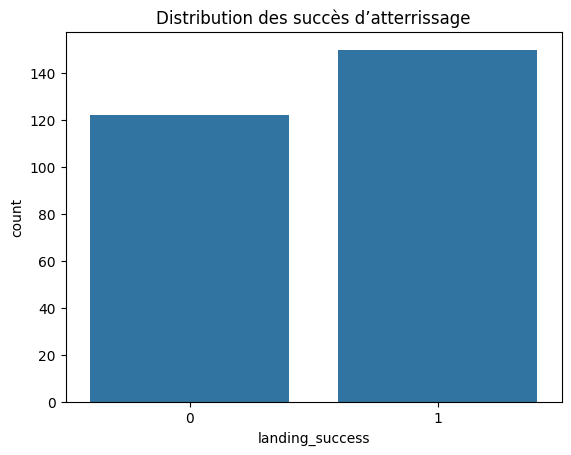

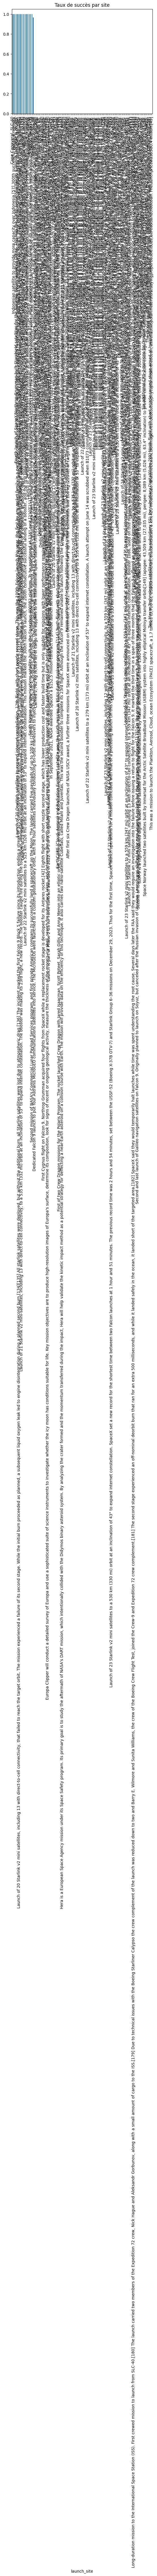

In [10]:
# Exploratory Data Analysis (EDA)

import matplotlib.pyplot as plt
import seaborn as sns

# Distribution du succès
sns.countplot(x='landing_success', data=df_wiki)
plt.title('Distribution des succès d’atterrissage')
plt.show()

# Succès par site de lancement
site_success = df_wiki.groupby('launch_site')['landing_success'].mean().sort_values(ascending=False)
site_success.plot(kind='bar', title='Taux de succès par site')
plt.show()

# Carte des sites
import folium

# Exemple : coordonnées fictives
launch_sites = {
    'CCAFS SLC 40': [28.5623, -80.5774],
    'KSC LC 39A': [28.5733, -80.6469],
    'VAFB SLC 4E': [34.6321, -120.6106]
}

m = folium.Map(location=[28.5, -80.5], zoom_start=4)

for site, coord in launch_sites.items():
    folium.Marker(location=coord, popup=site).add_to(m)

m


In [13]:
# Extraire uniquement les nb : Il faut nettoyer payload_mass pour garder uniquement la valeur numérique (en kg) :
import re
import numpy as np

# Fonction pour extraire le nombre en kg
def extract_payload_mass(x):
    if pd.isna(x):
        return np.nan
    # Cherche un nombre avec des virgules ou points
    match = re.search(r'([\d,]+)\s*kg', str(x))
    if match:
        # Remplace les virgules et convertit en float
        return float(match.group(1).replace(',', ''))
    else:
        return np.nan

# Appliquer au DataFrame
df_wiki['payload_mass'] = df_wiki['payload_mass'].apply(extract_payload_mass)

# Vérifier
df_wiki[['payload_mass']].head()


,payload_mass
0,16800.0
1,NaN
2,1800.0
3,NaN
4,17100.0


In [14]:
# MACHINE LEARNING PREDICTION
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Sélection des features et de la cible
features = df_wiki[['payload_mass', 'orbit', 'launch_site']].copy()
target = df_wiki['landing_success']

# Encodage des variables catégorielles
features = pd.get_dummies(features, columns=['orbit', 'launch_site'], drop_first=True)
features = features.fillna(features.mean())

# Split train/test
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Normalisation
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Modèles à comparer
models = {
    'Logistic Regression': LogisticRegression(max_iter=200),
    'Decision Tree': DecisionTreeClassifier(),
    'SVM': SVC(),
    'KNN': KNeighborsClassifier()
}

# Entraînement et évaluation
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"{name} - Accuracy: {acc:.3f}")


Logistic Regression - Accuracy: 0.945
Decision Tree - Accuracy: 0.945
SVM - Accuracy: 0.764
KNN - Accuracy: 0.745


In [15]:
# CHOIX DU MEILLEUR MODELE
# Exemple : arbre de décision plus détaillé
best_model = DecisionTreeClassifier(max_depth=5)
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

print("Matrice de confusion :")
print(confusion_matrix(y_test, y_pred))
print("Accuracy :", accuracy_score(y_test, y_pred))


Matrice de confusion :
[[23  0]
 [ 3 29]]
Accuracy : 0.9454545454545454
